In [0]:
%tensorflow_version 1.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Early Stopping

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Setting up Early Stopping</ol>
<ol>7. Training the model using Early Stopping</ol>
<ol>8. Evaluating model performance</ol>

## 1. Loading the dataset

In [0]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# unzipping the Dataset.zip file
!unzip /content/drive/My\ Drive/Dataset.zip

In [0]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [0]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [0]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [0]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [0]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the data

In [0]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [0]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [0]:
# normalizing the pixel values
X = X / X.max()

In [0]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [0]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [0]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [0]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

## 5. Compiling the model

In [0]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [0]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Setting up Early Stopping

In [0]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [0]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

## 7. Training the model using Early Stopping

In [0]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Train on 1646 samples, validate on 706 samples
Epoch 1/100



1646/1646 [==============================] - 10s 6ms/step - loss: 0.6667 - acc: 0.5893 - val_loss: 0.6495 - val_acc: 0.6303
Epoch 2/100
1646/1646 [==============================] - 1s 860us/step - loss: 0.6443 - acc: 0.6525 - val_loss: 0.6495 - val_acc: 0.5977
Epoch 3/100
1646/1646 [==============================] - 1s 860us/step - loss: 0.6280 - acc: 0.6561 - val_loss: 0.6253 - val_acc: 0.6615
Epoch 4/100
1646/1646 [==============================] - 1s 857us/step - loss: 0.6204 - acc: 0.6677 - val_loss: 0.6178 - val_acc: 0.6771
Epoch 5/100
1646/1646 [==============================] - 1s 856us/step - loss: 0.6108 - acc: 0.6786 - val_loss: 0.6119 - val_acc: 0.6686
Epoch 6/100
1646/1646 [==============================] - 1s 860us/step - loss: 0.6034 - acc: 0.6926 - val_loss: 0.6080 - val_acc: 0.6700
Epoch 7/100
1646/1646 [==============================] - 1s 852us/step - loss: 0.5968 - acc: 0.6999 - val_loss: 0.6125 - val_acc: 0.6643
Epoch 8/100
1646/1646 [==============================]

## 8. Evaluating model performance 

In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.6968838526912181 %


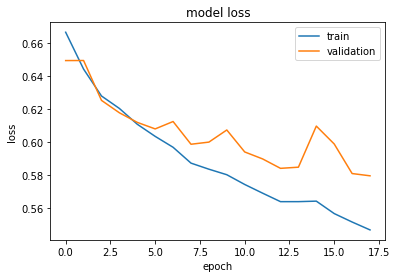

In [0]:
 # summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

![alt text](https://drive.google.com/uc?id=1Z-ceA9CQH5W4ecusIyzqLLJn2djR8vQb)

## Hyperparameter tuning for Early Stopping (Increasing the patience value)

In [0]:
# defining and compiling the model

# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [0]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [0]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid), callbacks=[early_stopping])

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6552 - acc: 0.6136 - val_loss: 0.6668 - val_acc: 0.5907
Epoch 2/100
1646/1646 [==============================] - 1s 860us/step - loss: 0.6273 - acc: 0.6458 - val_loss: 0.6157 - val_acc: 0.6700
Epoch 3/100
1646/1646 [==============================] - 1s 868us/step - loss: 0.5974 - acc: 0.6847 - val_loss: 0.6009 - val_acc: 0.6813
Epoch 4/100
1646/1646 [==============================] - 1s 865us/step - loss: 0.5813 - acc: 0.7096 - val_loss: 0.5951 - val_acc: 0.6827
Epoch 5/100
1646/1646 [==============================] - 1s 866us/step - loss: 0.5679 - acc: 0.7248 - val_loss: 0.5935 - val_acc: 0.6870
Epoch 6/100
1646/1646 [==============================] - 1s 860us/step - loss: 0.5616 - acc: 0.7388 - val_loss: 0.5782 - val_acc: 0.6926
Epoch 7/100
1646/1646 [==============================] - 1s 863us/step - loss: 0.5621 - acc: 0.7321 - val_loss: 0.5826 - val_acc: 0.6

In [0]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7138810198300283 %


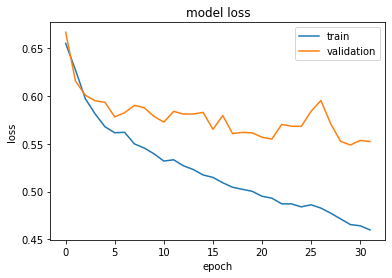

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()